In [2]:
import torch
torch.cuda.empty_cache() 

In [3]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image

In [4]:
import pandas as pd
import pyproj

In [5]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [6]:
from pathlib import Path

In [7]:
import joblib

In [8]:
from mt_function_yl import *

In [9]:
import seaborn as sn

In [10]:
from scipy import stats

In [11]:
from tabulate import tabulate

In [12]:
import statsmodels.api as sm

In [13]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

from sklearn import linear_model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn import svm

import seaborn as sn


# For regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import PredictionErrorDisplay

### Data loading

In [14]:
aa = pd.read_csv('/home/yelhe/script/mt/dataraw/dfaa.csv')

In [15]:
acv = pd.read_csv('/home/yelhe/script/mt/model/allvariable_accident.csv')
rpv = pd.read_csv('/home/yelhe/script/mt/model/allvariable_rp.csv')

In [16]:
# same size
acv0 = acv.drop(['SV','LV','pd','svp','lvp','pdp'], axis = 1)
acv0 = acv0.assign(acp = 1)
acv0 = acv0.rename(columns = {'Nr':'id'})

In [17]:
rpv0 = rpv.drop(['speedlimit_7', 'z_qnr_34'], axis = 1)
rpv0 = rpv0.assign(acp = 0)

In [18]:
print(acv.columns.values)

['Nr' 'cp' 'ie' 'iemin' 'iemax' 'mew' 'mewmin' 'mewmax' 'meg' 'megmin'
 'megmax' 'cmean' 'cmin' 'cmax' 'dbusl' 'dtraml' 'dtrainl' 'dplight'
 'dstation' 'dparkcar' 'dparktw' 'dpedcro' 'dstopsign' 'dcurb'
 'dtrafficarea' 'droad' 'droad_sl' 'dvfpath' 'd_bicyclecount' 'd_carcount'
 'gvm_dwv' 'gvm_msp' 'gvm_asp' 'bicyclecount' 'carcount' 'r_width_value'
 'speedlimit_value' 'curbtype' 'z_qnr' 'z_knr' 'trafficarea' 'r_width'
 'r_surface' 'speedlimit' 'curbtype_1' 'curbtype_2' 'z_qnr_1' 'z_qnr_2'
 'z_qnr_3' 'z_qnr_4' 'z_qnr_5' 'z_qnr_6' 'z_qnr_7' 'z_qnr_8' 'z_qnr_9'
 'z_qnr_10' 'z_qnr_11' 'z_qnr_12' 'z_qnr_13' 'z_qnr_14' 'z_qnr_15'
 'z_qnr_16' 'z_qnr_17' 'z_qnr_18' 'z_qnr_19' 'z_qnr_20' 'z_qnr_21'
 'z_qnr_22' 'z_qnr_23' 'z_qnr_24' 'z_qnr_25' 'z_qnr_26' 'z_qnr_27'
 'z_qnr_28' 'z_qnr_29' 'z_qnr_30' 'z_qnr_31' 'z_qnr_32' 'z_qnr_33'
 'z_knr_1' 'z_knr_2' 'z_knr_3' 'z_knr_4' 'z_knr_5' 'z_knr_6' 'z_knr_7'
 'z_knr_8' 'z_knr_9' 'z_knr_10' 'z_knr_11' 'z_knr_12' 'trafficarea_1'
 'trafficarea_2' 'traffica

In [19]:
dfacrpv = pd.concat([acv0, rpv0])

In [20]:
len(dfacrpv.columns.values)

110

In [21]:
print(dfacrpv.columns.values)

['id' 'cp' 'ie' 'iemin' 'iemax' 'mew' 'mewmin' 'mewmax' 'meg' 'megmin'
 'megmax' 'cmean' 'cmin' 'cmax' 'dbusl' 'dtraml' 'dtrainl' 'dplight'
 'dstation' 'dparkcar' 'dparktw' 'dpedcro' 'dstopsign' 'dcurb'
 'dtrafficarea' 'droad' 'droad_sl' 'dvfpath' 'd_bicyclecount' 'd_carcount'
 'gvm_dwv' 'gvm_msp' 'gvm_asp' 'bicyclecount' 'carcount' 'r_width_value'
 'speedlimit_value' 'curbtype' 'z_qnr' 'z_knr' 'trafficarea' 'r_width'
 'r_surface' 'speedlimit' 'curbtype_1' 'curbtype_2' 'z_qnr_1' 'z_qnr_2'
 'z_qnr_3' 'z_qnr_4' 'z_qnr_5' 'z_qnr_6' 'z_qnr_7' 'z_qnr_8' 'z_qnr_9'
 'z_qnr_10' 'z_qnr_11' 'z_qnr_12' 'z_qnr_13' 'z_qnr_14' 'z_qnr_15'
 'z_qnr_16' 'z_qnr_17' 'z_qnr_18' 'z_qnr_19' 'z_qnr_20' 'z_qnr_21'
 'z_qnr_22' 'z_qnr_23' 'z_qnr_24' 'z_qnr_25' 'z_qnr_26' 'z_qnr_27'
 'z_qnr_28' 'z_qnr_29' 'z_qnr_30' 'z_qnr_31' 'z_qnr_32' 'z_qnr_33'
 'z_knr_1' 'z_knr_2' 'z_knr_3' 'z_knr_4' 'z_knr_5' 'z_knr_6' 'z_knr_7'
 'z_knr_8' 'z_knr_9' 'z_knr_10' 'z_knr_11' 'z_knr_12' 'trafficarea_1'
 'trafficarea_2' 'traffica

In [22]:
dfacrpv.to_csv('/home/yelhe/script/mt/model/dfacrpv.csv', index = False)

In [23]:
dfacrpv['r_width'].unique()

array([ 4,  2,  8,  6, 10,  3,  1])

In [24]:
# droad_sl  'd_bicyclecount' 'd_carcount' 'curbtype'   'z_qnr' 'z_knr'  'trafficarea'
# 'r_width''r_surface' 'speedlimit'

### Regression

In [25]:
cn = ['cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg', 
      'megmin', 'megmax', 'cmean', 'cmin', 'cmax', 'dbusl', 'dtraml', 
      'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dcurb',
      'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width_value',
      'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5',
      'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13',
      'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
      'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1', 'z_knr_2', 'z_knr_3',
       'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9',
       'z_knr_10', 'z_knr_11', 'z_knr_12', 'trafficarea_1', 'trafficarea_2',
       'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2',
       'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4',
       'speedlimit_5', 'speedlimit_6', 'bicyclecount', 'carcount']

In [26]:
dfacrpv.shape

(1087, 110)

In [27]:
y1 = dfacrpv['acp']
x = dfacrpv[cn]
model1 = sm.OLS(y1, x)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acp   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     21.91
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          1.84e-182
Time:                        00:46:28   Log-Likelihood:                -55.119
No. Observations:                1087   AIC:                             298.2
Df Residuals:                     993   BIC:                             767.4
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cp                  -0.2680      0.052     -5.188      0.000      -0.369      -0.167
ie                  -0.0324      0.079     -0.412      0.681      -0.187       0.122
iemin               -0.0032      0.050     -0.064      0.949      -0.102       0.095
iemax                0.0180      0.037      0.485      0.628      -0.055       0.091
mew                  0.0031      0.033      0.096      0.924      -0.061       0.067
mewmin              -0.0090      0.021     -0.422      0.673      -0.051       0.033
mewmax               0.0123      0.020      0.619      0.536      -0.027       0.051
meg                 -0.0101      0.029     -0.351      0.726      -0.067       0.047
megmin               0.0004      0.021      0.019      0.985      -0.040       0.041
megmax               0.0129      0.016      0.799      0.425      -0.019       0.045
cmean                0.0608      0.033      1.861      0.063      -0.003       0.125
cmin                -0.0151      0.009     -1.722      0.085      -0.032       0.002
cmax                 0.0812      0.039      2.056      0.040       0.004       0.159
dbusl               -0.0179      0.011     -1.573      0.116      -0.040       0.004
dtraml               0.0290      0.012      2.417      0.016       0.005       0.053
dtrainl              0.0300      0.011      2.772      0.006       0.009       0.051
dplight              0.0055      0.009      0.585      0.559      -0.013       0.024
dstation             0.0019      0.011      0.175      0.861      -0.019       0.023
dparkcar            -0.0068      0.011     -0.612      0.541      -0.029       0.015
dparktw              0.0060      0.010      0.580      0.562      -0.014       0.026
dpedcro              0.0044      0.010      0.426      0.670      -0.016       0.025
dstopsign            0.0300      0.012      2.549      0.011       0.007       0.053
dcurb               -0.0120      0.015     -0.813      0.416      -0.041       0.017
dtrafficarea         0.0399      0.014      2.885      0.004       0.013       0.067
droad               -0.0003      0.012     -0.028      0.978      -0.024       0.023
dvfpath             -0.0106      0.009     -1.189      0.235      -0.028       0.007
gvm_dwv             -0.1395      0.062     -2.267      0.024      -0.260      -0.019
gvm_msp              0.0283      0.053      0.533      0.594      -0.076       0.132
gvm_asp              0.0991      0.060      1.646      0.100      -0.019       0.217
r_width_value       -0.1306      0.020     -6.500      0.000      -0.170      -0.091
speedlimit_value    -0.2709      0.039     -7.004      0.000      -0.347      -0.195
curbtype_1           0.3251      0.062      5.258      0.000       0.204       0.446
curbtype_2           0.1317      0.060      2.179      0.030       0.013       0.250
z_qnr_1              0.

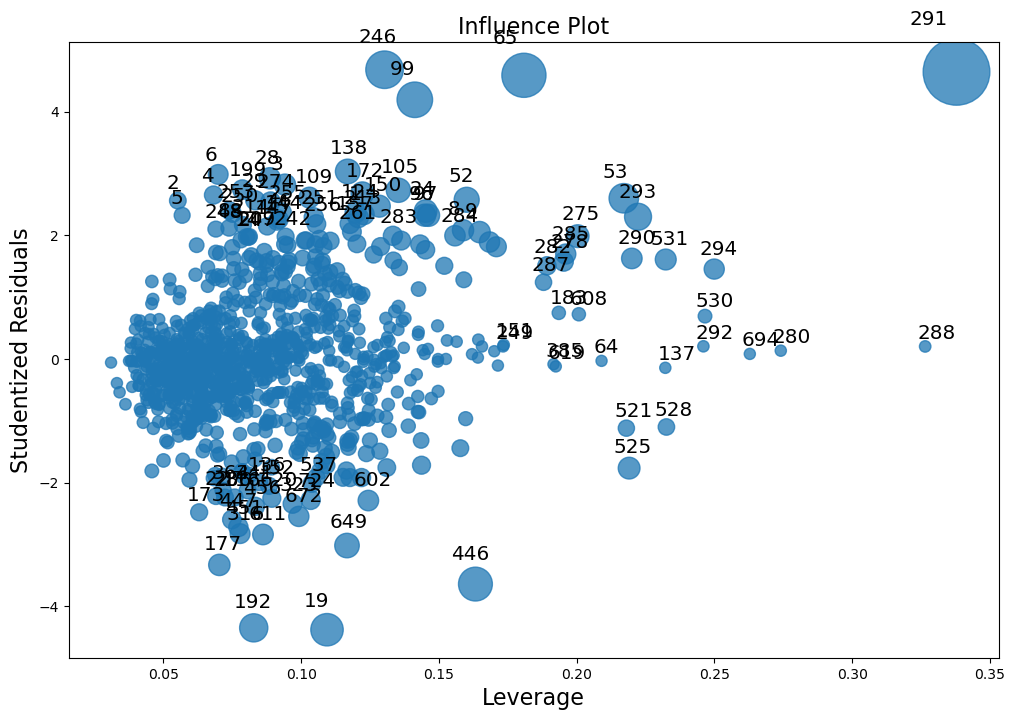

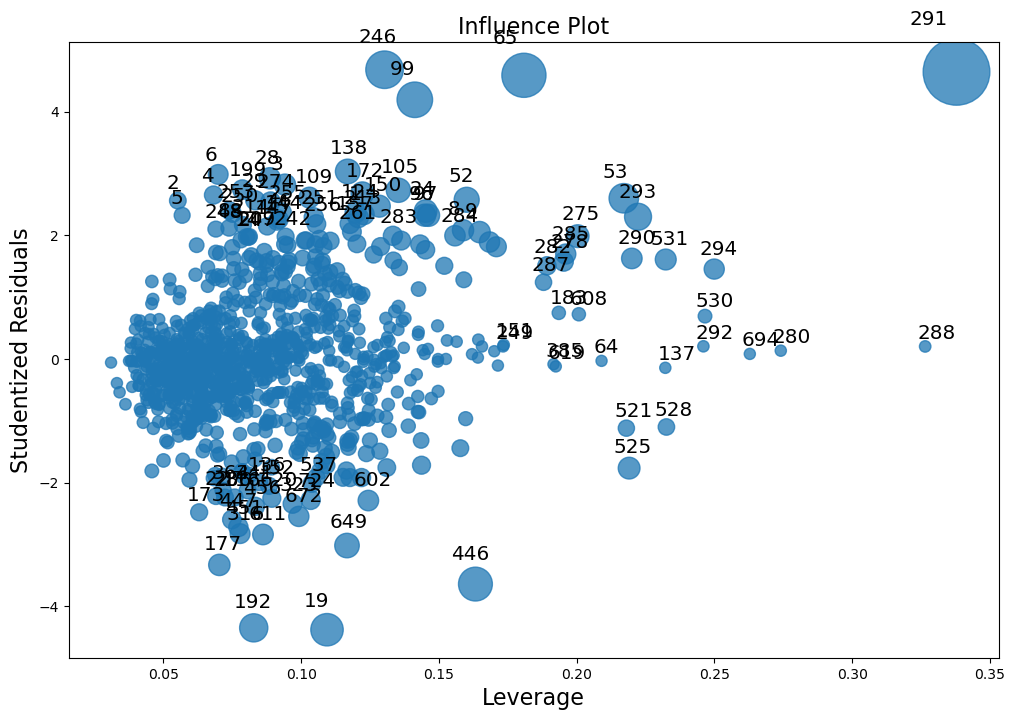

In [33]:
plt.rc("figure",figsize = (12,8))
sm.graphics.influence_plot(result1, criterion="cooks")


In [71]:
r1p = result1.pvalues
r1pdf = pd.DataFrame(r1p)
r1pdf = r1pdf.reset_index()
a1 = r1pdf.nsmallest(50, 0)
print(a1)
ten1 = a1['index'].to_list()

               index             0
30  speedlimit_value  4.567555e-12
85         r_width_5  2.604306e-11
29     r_width_value  1.266609e-10
83         r_width_3  1.419964e-08
80     trafficarea_3  3.367775e-08
70           z_knr_5  8.887790e-08
88       r_surface_1  1.279928e-07
91      speedlimit_2  1.580022e-07
31        curbtype_1  1.779576e-07
0                 cp  2.575018e-07
71           z_knr_6  7.738800e-07
39           z_qnr_7  1.629269e-06
86         r_width_6  4.472599e-06
40           z_qnr_8  5.050287e-06
77          z_knr_12  1.379314e-05
46          z_qnr_14  1.790780e-05
33           z_qnr_1  3.456005e-05
92      speedlimit_3  3.745848e-05
43          z_qnr_11  4.396171e-05
44          z_qnr_12  4.471336e-05
74           z_knr_9  4.495161e-05
90      speedlimit_1  5.093230e-05
66           z_knr_1  6.739357e-05
37           z_qnr_5  1.386309e-04
68           z_knr_3  2.175227e-04
78     trafficarea_1  2.741221e-04
75          z_knr_10  4.109128e-04
47          z_qnr_15

In [70]:
r1pdf.to_csv('/home/yelhe/script/mt/model/dfolsacp.csv', index = False)

In [55]:
from statsmodels.gam.api import GLMGam, BSplines
# pip install pygam
import pygam

In [56]:
y2 = dfacrpv['acp']
gam = pygam.LinearGAM().fit(x, y2)

In [57]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     316.602
Link Function:                     IdentityLink Log Likelihood:                                -74925.0329
Number of Samples:                         1087 AIC:                                           150485.2697
                                                AICc:                                          150748.6452
                                                GCV:                                                0.0098
                                                Scale:                                              0.0048
                                                Pseudo R-Squared:                                   0.9827
Feature Function                  Lam

/sctmp/yelhe/ipykernel_128100/3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [64]:
cnl = ['cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg', 
      'megmin', 'megmax', 'cmean', 'cmin', 'cmax', 'dbusl', 'dtraml', 
      'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dcurb',
      'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width_value',
      'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5',
      'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13',
      'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
      'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1', 'z_knr_2', 'z_knr_3',
       'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9',
       'z_knr_10', 'z_knr_11', 'z_knr_12', 'trafficarea_1', 'trafficarea_2',
       'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2',
       'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4',
       'speedlimit_5', 'speedlimit_6', 'bicyclecount', 'carcount', 'intercept']

In [65]:
dfgam = pd.DataFrame()
dfgam['feature'] = cnl
dfgam['acp_p'] = gam.statistics_['p_values']

In [74]:
dfgam2 = pd.DataFrame()
dfgam2['coef'] = gam.coef_

In [75]:
dfgam2.to_csv('/home/yelhe/script/mt/model/dfgam2acp.csv', index = False)

In [68]:
dfgam.nsmallest(50, 'acp_p')

,feature,acp_p
0,cp,1.110223e-16
8,megmin,1.110223e-16
10,cmean,1.110223e-16
11,cmin,1.110223e-16
12,cmax,1.110223e-16
23,dtrafficarea,1.110223e-16
25,dvfpath,1.110223e-16
29,r_width_value,1.110223e-16
30,speedlimit_value,1.110223e-16
31,curbtype_1,1.110223e-16
